In [1]:
# 1.1. Length of a vector
import numpy as np
def compute_vector_length(vector):
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector

In [2]:
# 1.2. Dot product
def compute_dot_product(vector1, vector2):
  result = np.dot(vector1, vector2)
  return result

In [3]:
# 1.3. Multiplying a vector by a matrix
def matrix_multi_vector(matrix, vector):
  result = np.dot(matrix, vector)
  return result

In [4]:
# 1.4. Multiplying a matrix by a matrix
def matrix_multi_matrix(matrix1, matrix2):
  len_of_vector = np.dot(matrix1, matrix2)
  return len_of_vector

In [5]:
# 1.5. Matrix inverse
import numpy as np
def inverse_matrix(matrix):
  result = np.linalg.inv(matrix)
  return result

In [6]:
# 2.1. Eigenvector and eigenvalue
def compute_eigenvalues_eigenvectors(matrix):
  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  return eigenvalues, eigenvectors

In [7]:
# 3.1. Cosine Similarity
def compute_cosine(v1, v2):
  cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
  return cos_sim

In [8]:
# 4. Background subtraction
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

In [9]:
def compute_difference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

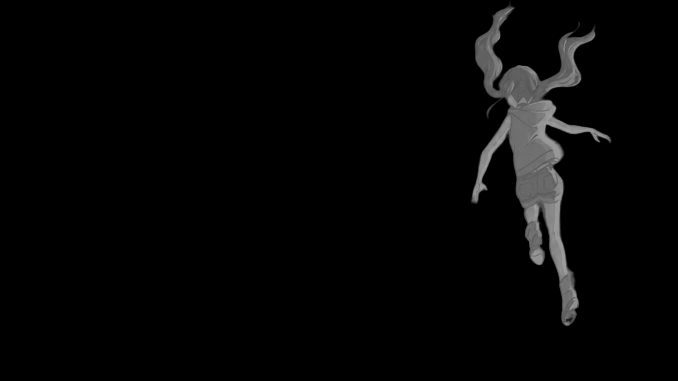

In [10]:
difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

In [11]:
def compute_binary_mask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

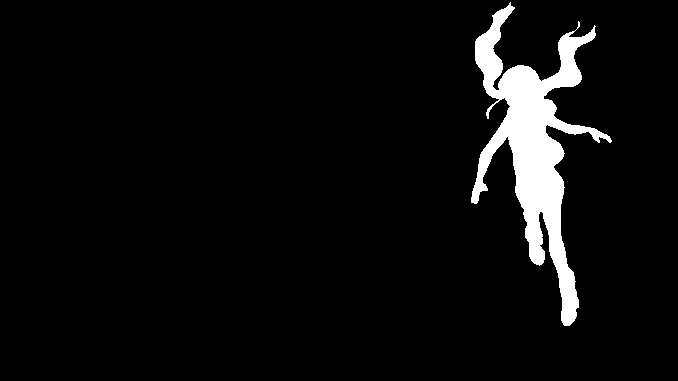

In [12]:
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

In [13]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image,ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)

    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output

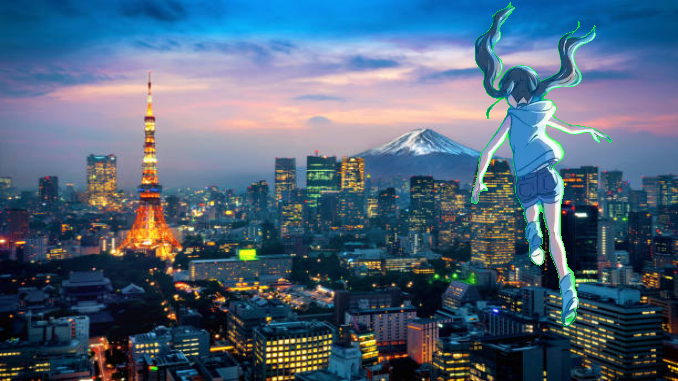

In [14]:
output = replace_background(bg1_image, bg2_image, ob_image)

cv2_imshow(output)